In [4]:
import numpy as np

# Input
For this question, DH parameters are :-

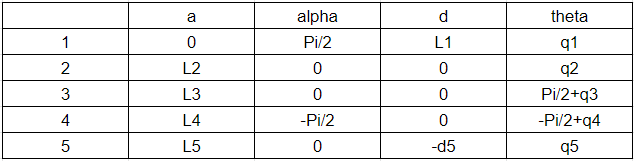

In [1]:
matrix=[]

n=int(input("No. of links: "))
sym=["a","alpha","d","theta"]
for i in range(n):
  a=[]
  for j in range(4):
    a.append(float(input(f"Link-{i+1},{sym[j]} : ")))
  matrix.append(a)
  print("\n")

matrix

No. of links: 5
Link-1,a : 0
Link-1,alpha : 1.57079
Link-1,d : 1
Link-1,theta : 1


Link-2,a : 1
Link-2,alpha : 0
Link-2,d : 0
Link-2,theta : 1


Link-3,a : 1
Link-3,alpha : 0
Link-3,d : 0
Link-3,theta : 1.57079


Link-4,a : 1
Link-4,alpha : -1.57079
Link-4,d : 0
Link-4,theta : 0


Link-5,a : 1
Link-5,alpha : 0
Link-5,d : 1
Link-5,theta : 0.5




[[0.0, 1.57079, 1.0, 1.0],
 [1.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 1.57079],
 [1.0, -1.57079, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.5]]

# D-H Transformation Matrix Function

In [5]:
def dh(arr):
  a=arr[0]
  alpha=arr[1]
  d=arr[2]
  theta = arr[3]

  mat = []
  b=[np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)]
  mat.append(b)

  b=[np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)]
  mat.append(b)

  b=[0, np.sin(alpha), np.cos(alpha), d]
  mat.append(b)

  b=[0,0,0,1]
  mat.append(b)

  return np.matrix(mat)

In [6]:
dh(matrix[1])

matrix([[ 0.54030231, -0.84147098,  0.        ,  0.54030231],
        [ 0.84147098,  0.54030231, -0.        ,  0.84147098],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

#Transformation Matrix

In [7]:
T = np.identity(4)
Tmat = []
for i in range(n):
  T=np.matmul(T,dh(matrix[i]))
  Tmat.append(T)
print(f"Transformation Matrix (0-{n}) : \n\n{T}")

Transformation Matrix (0-5) : 

[[-0.80241625 -0.52049119 -0.29191965 -1.71171329]
 [-0.36235539  0.81362357 -0.45465949 -1.77850068]
 [ 0.47415897 -0.2590475  -0.84146757  2.55477765]
 [ 0.          0.          0.          1.        ]]


#End effector Position

In [9]:
posn=np.matrix([0,0,0,1])
Pos = np.matmul(Tmat[-1],posn.T)
print(f"Position (0): \n\n{Pos[:3]}")


Position (0): 

[[-1.71171329]
 [-1.77850068]
 [ 2.55477765]]
